In [65]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import jdutil
from scipy import signal
from sklearn.decomposition import PCA

In [66]:
kN1 = 30*0.018e-2 # roughness to be used on GM model
kN2 = 30*0.4e-2    

In [67]:
print (kN1)

0.0054


In [68]:
advbfn = '/media/taran/DATADRIVE2/Obs_data/data_netcdf/9917advb-cal.nc'# ; % burstfile name
advsfn = '/media/taran/DATADRIVE2/Obs_data/data_netcdf/9917advs-cal.nc'#; % statistics filename

In [69]:
nc_advbfn = netCDF4.Dataset(advbfn)
nc_advsfn = netCDF4.Dataset(advsfn)

In [70]:
time = nc_advsfn.variables['time']
time2= nc_advsfn.variables['time2']
#jt = time#+time2#/(3600*24*1000)

time2=(time2[:])/(3600.0*24.0*1000.0)
jt=time+time2
#dn1=jd_to_datetime(jt)
#dn2=jd_to_date(jt)

#dn1=jdutil.jd_to_datetime(jt[:])
for i in range(0,len(jt)):
    dn2=jdutil.jd_to_datetime(jt[i])
    print(dn2) 
print(dn2) 

2014-02-08 03:59:56.936998
2014-02-08 04:59:56.936984
2014-02-08 05:59:49.937009
2014-02-08 06:59:49.936996
2014-02-08 07:59:55.936990
2014-02-08 08:59:55.937017
2014-02-08 09:59:55.937003
2014-02-08 10:59:49.936982
2014-02-08 11:59:55.937017
2014-02-08 12:59:55.937003
2014-02-08 13:59:55.936990
2014-02-08 14:59:55.937017
2014-02-08 15:59:55.937003
2014-02-08 16:59:55.936990
2014-02-08 17:59:55.937017
2014-02-08 18:59:55.937003
2014-02-08 19:59:55.936990
2014-02-08 20:59:55.937017
2014-02-08 21:59:55.937003
2014-02-08 22:59:49.936982
2014-02-08 23:59:55.937017
2014-02-09 00:59:55.937003
2014-02-09 01:59:55.936990
2014-02-09 02:59:55.937017
2014-02-09 03:59:55.937003
2014-02-09 04:59:55.936990
2014-02-09 05:59:55.937017
2014-02-09 06:59:55.937003
2014-02-09 07:59:55.936990
2014-02-09 08:59:55.937017
2014-02-09 09:59:55.937003
2014-02-09 10:59:55.936990
2014-02-09 11:59:49.937009
2014-02-09 12:59:55.937003
2014-02-09 13:59:55.936990
2014-02-09 14:59:55.937017
2014-02-09 15:59:55.937003
2

2014-04-29 20:59:16.936987
2014-04-29 21:59:16.937014
2014-04-29 22:59:16.937000
2014-04-29 23:59:16.936987
2014-04-30 00:59:16.937014
2014-04-30 01:59:16.937000
2014-04-30 02:59:16.936987
2014-04-30 03:59:16.937014
2014-04-30 04:59:16.937000
2014-04-30 05:59:16.936987
2014-04-30 06:59:16.937014
2014-04-30 07:59:16.937000
2014-04-30 08:59:16.936987
2014-04-30 09:59:15.937019
2014-04-30 10:59:15.937006
2014-04-30 11:59:15.936992
2014-04-30 12:59:15.937019
2014-04-30 13:59:15.937006
2014-04-30 14:59:15.936992
2014-04-30 15:59:15.937019
2014-04-30 16:59:15.937006
2014-04-30 17:59:15.936992
2014-04-30 18:59:15.937019
2014-04-30 19:59:15.937006
2014-04-30 20:59:15.936992
2014-04-30 21:59:15.937019
2014-04-30 22:59:15.937006
2014-04-30 23:59:15.936992
2014-05-01 00:59:15.937019
2014-05-01 01:59:15.937006
2014-05-01 02:59:15.936992
2014-05-01 03:59:15.937019
2014-05-01 04:59:15.937006
2014-05-01 05:59:15.936992
2014-05-01 06:59:15.937019
2014-05-01 07:59:15.937006
2014-05-01 08:59:15.936992
2

<class 'netCDF4._netCDF4.Variable'>
float32 u_1205(time, sample)
    name: u
    long_name: Eastward Velocity
    generic_name: u
    FORTRAN_format:  
    units: cm/s
    sensor_type: Sontek ADV
    sensor_depth: 14.567
    initial_sensor_height: 0.533
    valid_range: [-300.  300.]
    _FillValue: 1e+35
    minimum: -126.8887939453125
    maximum: 132.4994659423828
    serial_number: B245H
unlimited dimensions: time
current shape = (2045, 8400)
filling on


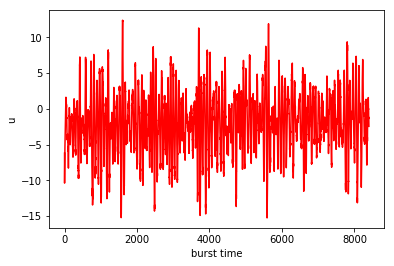

In [71]:
u=nc_advbfn['u_1205']
v=nc_advbfn['v_1206']
print (u)


In [72]:
# DETREND 
u_detrend=signal.detrend(u)
v_detrend=signal.detrend(v)

In [109]:
#BANDPASS FILTER
lowcut=4 
highcut=20 
fs=8  
butter_bandpass(lowcut, highcut, fs, order=5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

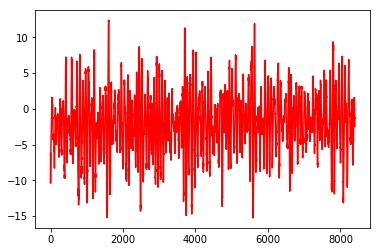

In [77]:
plt.plot(u[1,:], 'r-')
plt.hold('on')
plt.plot(u_detrend[1,:], 'b-')
#plt.plot(Output_dissip,A[:,0],'ro')
plt.xlabel('burst time')
plt.ylabel('u')
plt.show()                                                                                                          

In [106]:
for i in range(0,len(jt)):
    X=[u[i,:], v[i,:]]
#print (X) 
    pca = PCA(n_components=2)
    pca.fit(X)
    


TypeError: object of type 'PCA' has no len()

In [111]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
fs=9 
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

NameError: name 'butter_lowpass_filter' is not defined

In [102]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

TypeError: list indices must be integers or slices, not tuple